In [1]:
from utils import *
from prepare_ds import *
from train_ml import *
from create_map import *
from validation import *
from visualisation import *
from tqdm import tqdm
import matplotlib.pyplot as plt

downgrade_labels = False
force = False

if downgrade_labels:
    src = DEFAULT_PATH["labels"]
    out = DEFAULT_PATH["labels"] + "downgraded/"
    classes_matching = DEFAULT_PATH["labels"] + "classes_matching.csv"
    downgrade_classes(src, out, classes_matching, force=True)
    DEFAULT_PATH["labels"] = out

# you can use force=True for re-write all caches.
signs = parse_tifs_from(DEFAULT_PATH["images"], "sign", force=force)
signs = signs.query("type == 'sign'")
labels = parse_tifs_from(DEFAULT_PATH["labels"], "label", force=force)
labels = labels.query("type == 'label'")

# Prepare data for generate_dataset.
year = 2020
only_bands = ["r", "b", "g", "n"]
signs_paths = signs.query(
    f"year == {year} and season == '90d' and band in @only_bands"
).sort_values("band")
signs_paths = signs_paths["path"].to_list()
labels_paths = labels.query(f"year == {year}")["path"].to_list()

Initialization paths...
All paths was initialized.
Load 'sign' from cached DataFrame to path:  /Users/stephenhawking/Coding/ML/low2high_map/src/../data/processing/path2tif_sign.csv
Load 'label' from cached DataFrame to path:  /Users/stephenhawking/Coding/ML/low2high_map/src/../data/processing/path2tif_label.csv


In [3]:
homogen_layer = load_tif(
    "/Users/stephenhawking/Coding/ML/low2high_map/data/processing/resized/layers/homogeneous_layer.tif",
    only_first=True,
)
label = load_tif(
    "/Users/stephenhawking/Coding/ML/low2high_map/data/processing/cropped/labels/landcover23c_v571_2020.Samara.tif",
    only_first=True,
)

homogen_layer = homogen_layer["array"]
label = label["array"]

Loading file: /Users/stephenhawking/Coding/ML/low2high_map/data/processing/resized/layers/homogeneous_layer.tif
Files was loaded.
Loading file: /Users/stephenhawking/Coding/ML/low2high_map/data/processing/cropped/labels/landcover23c_v571_2020.Samara.tif
Files was loaded.


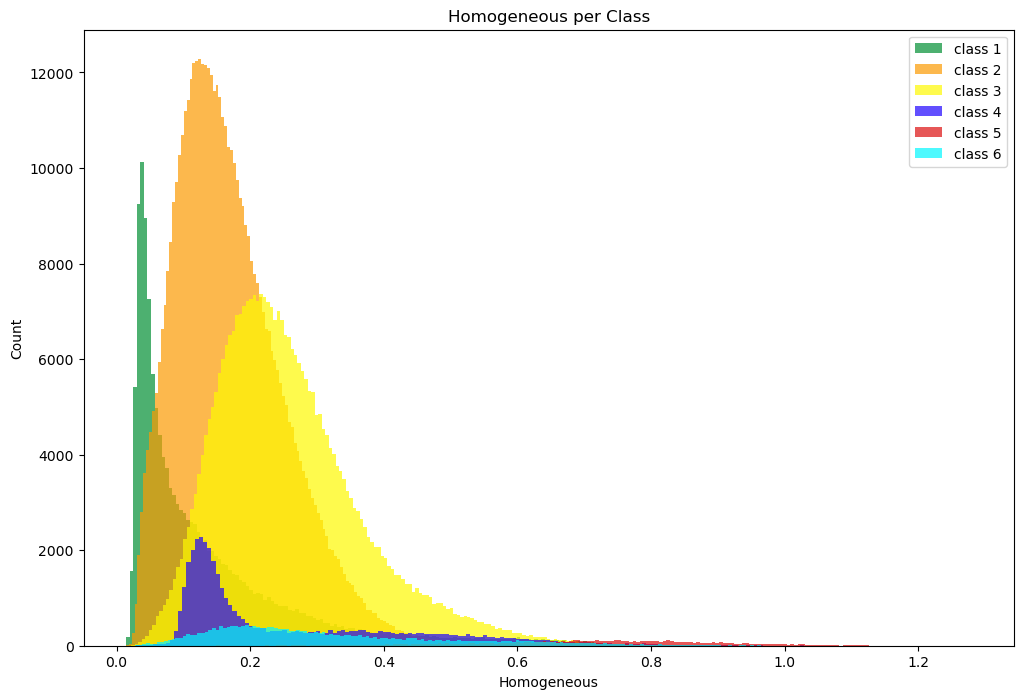

In [21]:
mask = homogen_layer > 0
l = label[mask].ravel()
b = homogen_layer[mask].ravel()

cl = np.unique(l)

plt.figure(figsize=(12, 8))
for c in cl:
    plt.hist(
        b[l == c], alpha=0.7, label=f"class {c}", bins=200, color=color_palette_plot[c]
    )
# plt.xlim(0, 1
plt.xlabel("Homogeneous")
plt.ylabel("Count")
plt.title("Homogeneous per Class")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

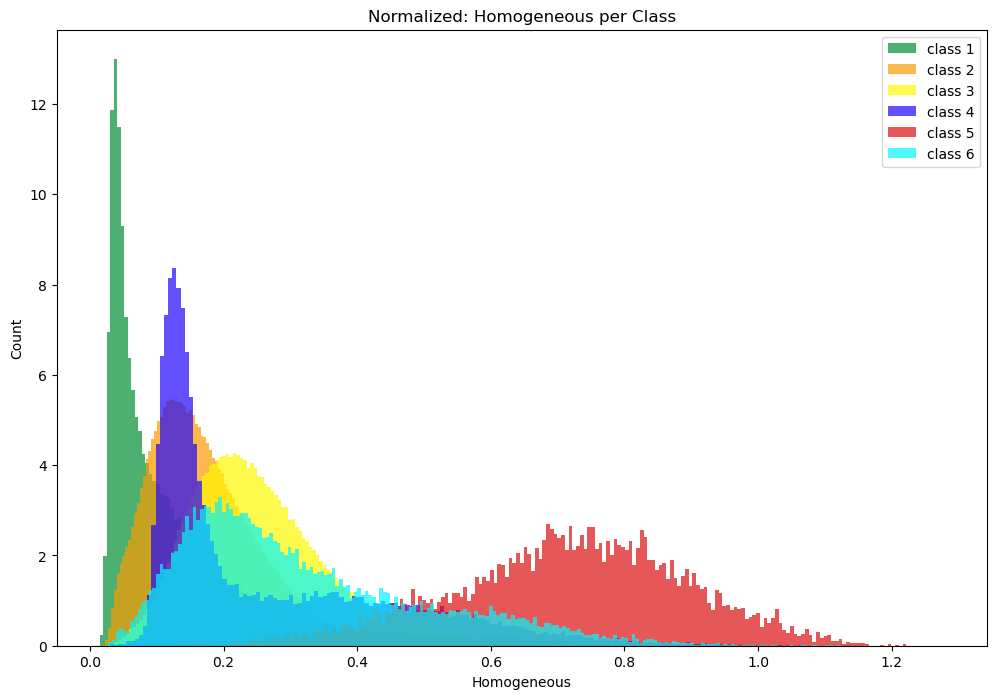

In [22]:
plt.clf()
plt.figure(figsize=(12, 8))
for c in cl:
    plt.hist(
        b[l == c],
        alpha=0.7,
        label=f"class {c}",
        bins=200,
        color=color_palette_plot[c],
        density=True,
    )
# plt.xlim(0, 1
plt.xlabel("Homogeneous")
plt.ylabel("Count")
plt.title("Normalized: Homogeneous per Class")
plt.legend()
plt.show()

/var/folders/hx/5lp4fxm91n123qr24t8v1g3w0000gn/T/ipykernel_38935/4040651371.py:3: RuntimeWarning: invalid value encountered in divide
  means = sum_brightless / counts


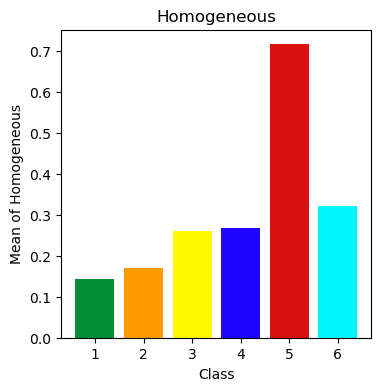

In [36]:
sum_brightless = np.bincount(l, weights=b)
counts = np.bincount(l)
means = sum_brightless / counts

classes = np.arange(len(means))
colors = [color_palette_plot[c] for c in classes]

plt.figure(figsize=(4, 4))
plt.bar(classes, means, color=colors)
plt.xlabel("Class")
plt.ylabel("Mean of Homogeneous")
plt.title("Homogeneous")
plt.show()